In [ ]:
 import numpy as np 
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from datetime import datetime, timedelta
 uber = pd.read_csv("My_Uber_Drives.csv")
 uber.head()

In [ ]:
print(uber.shape)
uber.dtypes

# Removing '*' symbol from Column names

In [ ]:
uber = uber.rename(columns=lambda x: x.replace("*",""))
uber=uber.drop(1155,axis=0)
uber

# Creating new column called 'Duration'

In [5]:
uber[['START_DATE','END_DATE']]=uber[['START_DATE','END_DATE']].apply(pd.to_datetime)


In [ ]:
uber['Duration']=uber['END_DATE'].dt.minute - uber['START_DATE'].dt.minute
uber['Duration'].astype(np.float64)
uber.groupby('PURPOSE').Duration.max()

In [7]:
uber[['START','STOP']] = uber[['START','STOP']].replace('Kar?chi','Karachi')

In [ ]:
uber[['START','PURPOSE']][uber['START']=='Karachi']

# For which category people use uber 

In [9]:
uber.CATEGORY.value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

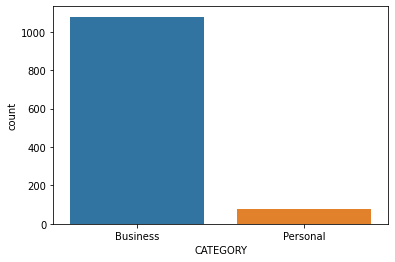

In [10]:
sns.countplot(data=uber,x=uber['CATEGORY'])

#Maximum duration for each type of Purpose


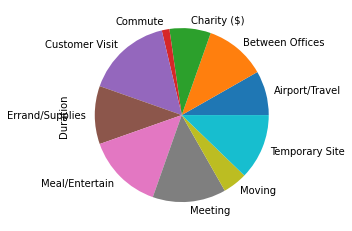

In [ ]:
uber.groupby('PURPOSE').Duration.max().plot(kind='pie')

# What hours do people take uber for their destination

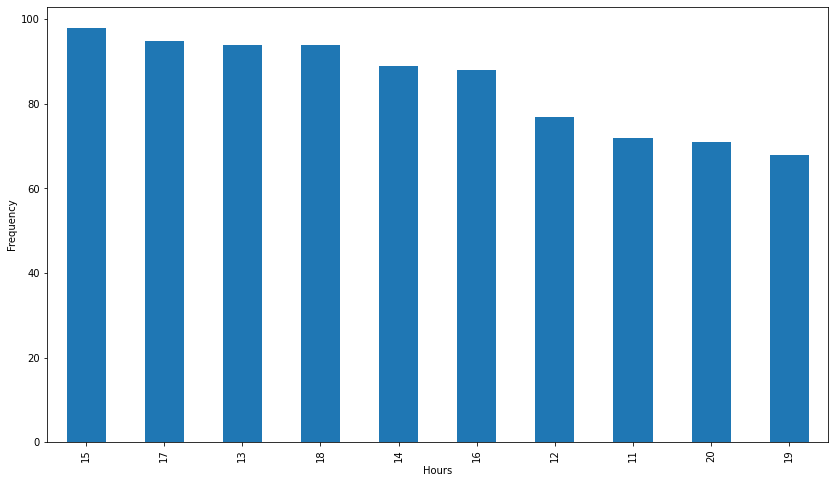

In [31]:
plt.figure(figsize=(14,8))
plt.xlabel('Hours')
plt.ylabel('Frequency')
uber['START_DATE'].dt.hour.value_counts().nlargest(10).plot.bar()


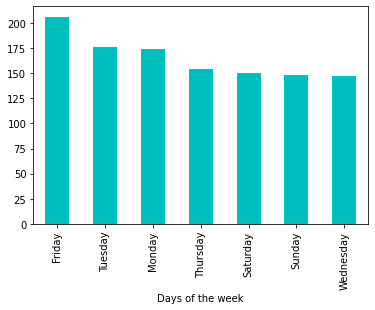

In [14]:
plt.xlabel('Days of the week')
uber['START_DATE'].dt.day_name().value_counts().plot(kind='bar',color='c')

# Frequency of Cities for start date

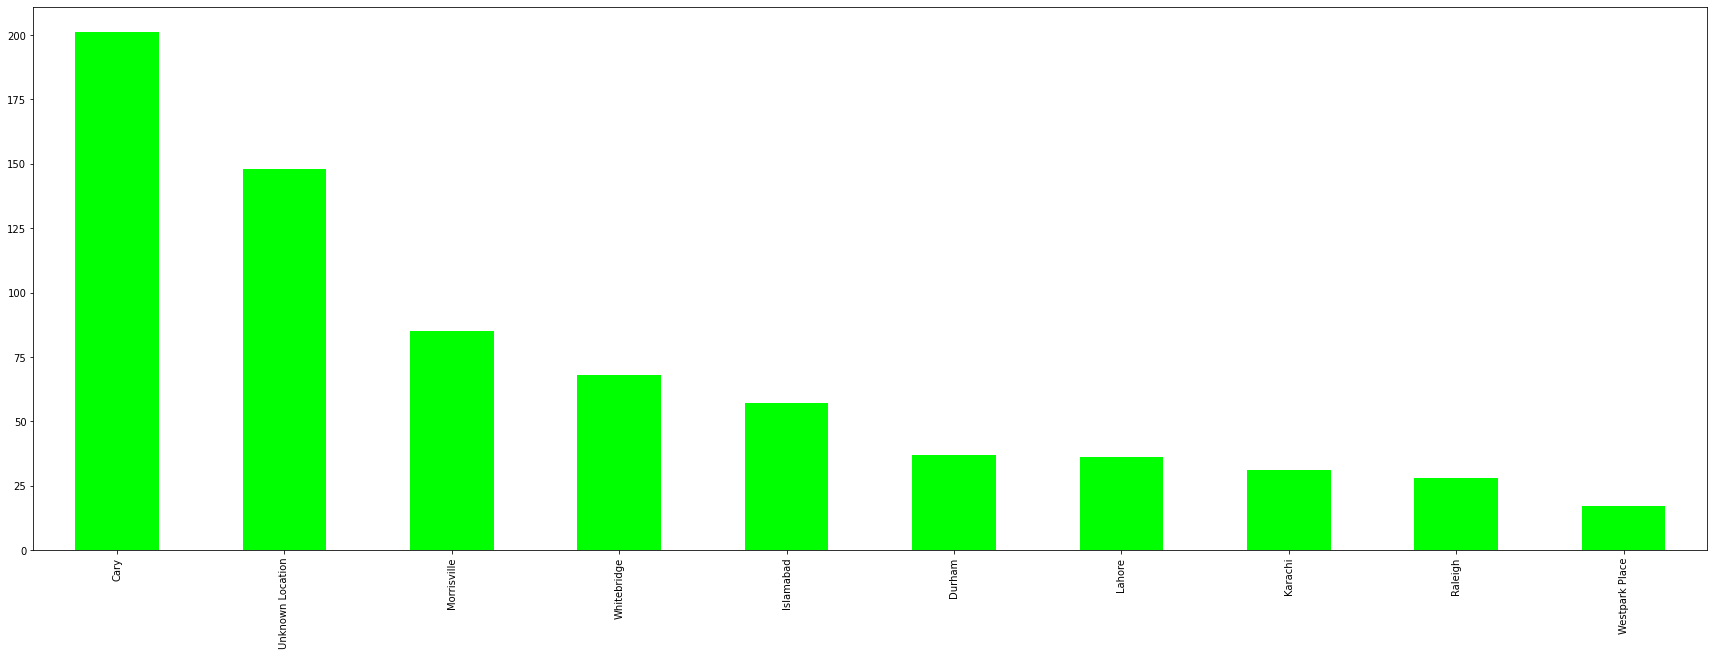

In [34]:
plt.figure(figsize=(30,10))
uber['START'].value_counts().nlargest(10).plot(kind='bar',color='lime')

# Category frequency for each day of week

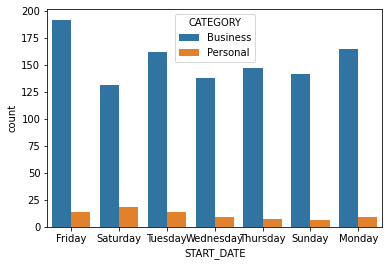

In [40]:
sns.countplot(hue=uber['CATEGORY'], x=uber['START_DATE'].dt.day_name());